## Spatial Correlations

In [301]:
#Import libraries
%matplotlib notebook
import geopandas as gpd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [310]:
#Import spatial information per well -- results of the Accuracy_plot script
gw_sel_int=gpd.read_file("D:/Data/students/mariana/data/SHP/gw_sel_int.shp")
gw_sel_int['r2+NSE']=gw_sel_int['r2']+gw_sel_int['NSE']
gw_sel_int['r2_2+NSE_2']=gw_sel_int['r2_2']+gw_sel_int['NSE_2']

In [314]:
lcol=[ "FOK", 'dist_pww', 'ho4_30m_sd','ho4_30m_ds', 'ho4_30m_lp',
      'dist_coast', 'imperv_buf', 'recharge_b', 'prop_211',
       'prop_231', 'prop_312', 'prop_112', 'prop_311','geo_1011',
       'geo_114', 'geo_111', 'geo_115', 'geo_1012', 'geo_1021']


perfor=['r2','NSE', 'r2_2', 'NSE_2','r2+NSE','r2_2+NSE_2']

#Create dataframe to store the correlations
lzero=np.zeros(len(lcol))
d = {'variable': lcol, 'r2': lzero,'NSE':lzero, 'r2_2':lzero, 'NSE_2':lzero}
dfrval = pd.DataFrame(data=d)
dfslope = pd.DataFrame(data=d)

#gw_sel_intc=gw_sel_int.copy()

for p in perfor:
    lslope, lrvalue= [],[]
    for col in lcol:
        
        #Restrict values bellow 9 km 
        if col== 'dist_pww':
            sortdf=gw_sel_int.sort_values(by=col).dropna(subset=[col])[:90]
        
        #Restricted to 25 km
        elif col== 'dist_coast':
            sortdf=gw_sel_int.sort_values(by=col).dropna(subset=[col])[:50]
  
        else:    
            sortdf=gw_sel_int.sort_values(by=col).dropna(subset=[col])

        slope, intercept, r_value, p_value, std_err = stats.linregress(sortdf[col], sortdf[p])
        
        #print(col)
        #print(r_value)

        lslope.append(round(slope,2))
        lrvalue.append(round(r_value,2))
    dfslope[p]=lslope
    dfrval[p]=lrvalue

In [315]:
#plt.figure()
#cmap = sns.diverging_palette(20, 220, as_cmap=True)
#sns.heatmap(dfrval[:20].set_index('variable'), annot=True,cmap=cmap, center=0)

In [316]:
dictionary={
            "FOK":'Filter depth', 
            'dist_pww':'Distance to water-works', 
            'ho4_30m_sd':'HO4_SD',
            'ho4_30m_ds':'HO4_DSD', 
            'ho4_30m_lp': 'HO4_LP',
            'dist_coast':'Distance to coastline', 
            'imperv_buf': 'Average Imperveousness', 
            'recharge_b':'Average long-term Recharge', 
            'prop_211':'Agri: Non-irrigated arable land',
            'prop_231': 'Agri: Pastures ' , 
            'prop_312':'Forest: Coniferous forest' ,
            'prop_112':' AS:Discontinuous urban fabric', 
            'prop_311':'Forest: Broad-leaved forest ',
            'geo_1011': 'Geo: Low Relief/ High-mod SMI',
            'geo_114':'Geo: Sink areas/ Medium SMI',
            'geo_111':'Geo:Sink areas/ High SMI',
            'geo_115':'Geo:Sink areas/ Low SMI' ,
            'geo_1012':'Geo:Low Relief/ High-mod SMI',
            'geo_1021':'Geo:Moderate Relief/ low SMI'
}

dfrval["variables_d"]=dfrval['variable'].map(dictionary)
dfrvalc=dfrval.drop(['variable'],axis=1)

<IPython.core.display.Javascript object>


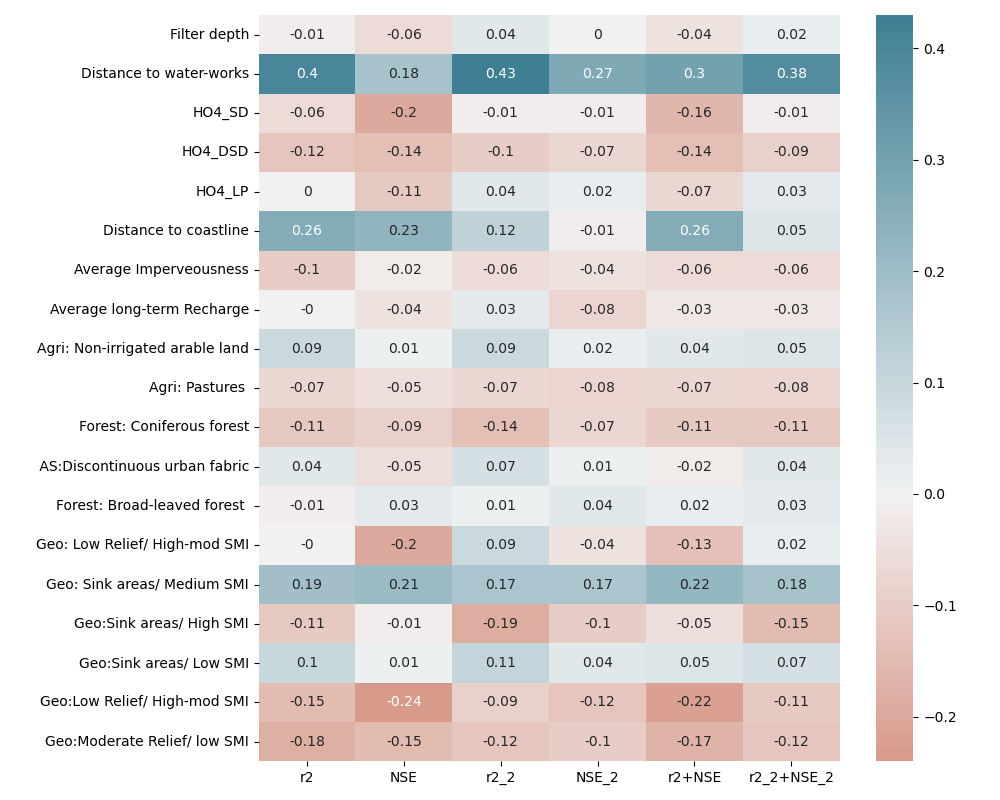

In [317]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(dfrvalc[:].set_index('variables_d'), annot=True,cmap=cmap, center=0)
plt.ylabel(' ')
plt.tight_layout()

## Scatter plots

<IPython.core.display.Javascript object>


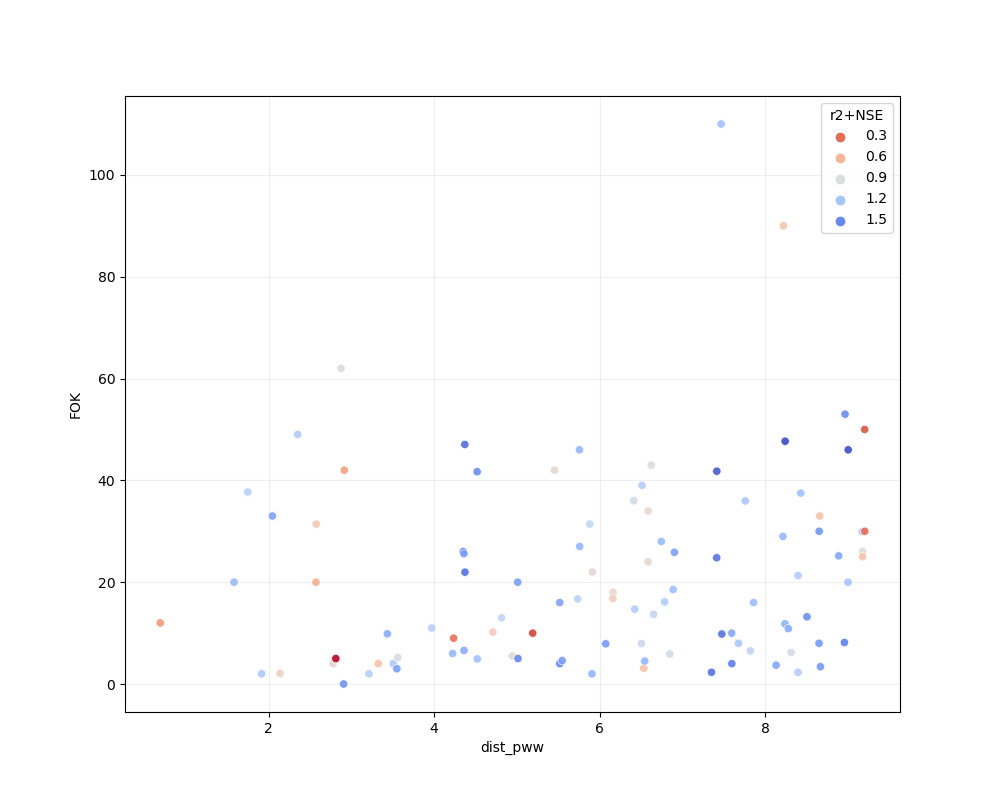

In [233]:
# Subset data

subset = gw_sel_int.sort_values(by='dist_pww')[:100]
plt.figure(figsize=(10,8))

sns.scatterplot(x='dist_pww', y='FOK', data=subset, 
                 hue='r2+NSE',palette="coolwarm_r", alpha=0.9)
plt.grid(True, alpha=0.2)

In [158]:
fig = plt.figure()
ax = plt.axes(projection='3d')

gw_sel_int2=gw_sel_int.sort_values(by='dist_pww')

# Data for a three-dimensional line
zline = gw_sel_int2['r2'][:100]
xline = gw_sel_int2['dist_pww'][:100]
yline = gw_sel_int2['FOK'][:100]
ax.scatter3D(xline, yline, zline, c=zline, cmap='viridis_r')
ax.set_xlabel('Dist waterworks')
ax.set_ylabel('Filter depth')
ax.set_zlabel('r2')


<IPython.core.display.Javascript object>

Text(0.5, 0, 'r2')